In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = 'xray_dataset_covid19/train'
validation_dir = 'xray_dataset_covid19/train'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

Found 148 images belonging to 2 classes.


In [3]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 148 images belonging to 2 classes.


Building the Model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

C:\Users\mailm\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the Model

In [5]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])


Training the Model

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9271 - loss: 0.5018 - val_accuracy: 0.9062 - val_loss: 0.4647
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8500 - loss: 0.4357 - val_accuracy: 1.0000 - val_loss: 0.3846
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9497 - loss: 0.4174 - val_accuracy: 0.9141 - val_loss: 0.4023
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9375 - loss: 0.4139 - val_accuracy: 0.9500 - val_loss: 0.3556
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8655 - loss: 0.3878 - val_accuracy: 0.8984 - val_loss: 0.3469
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.8750 - loss: 0.3784 - val_accuracy: 0.9500 - val_loss: 0.3229
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9613 - loss: 0.3346 - val_accuracy: 0.9453 - val_loss: 0.3016
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.9375 - loss: 0.3084 - val_accuracy: 0.8500 - val_loss: 0.3117


Evaluating the Model

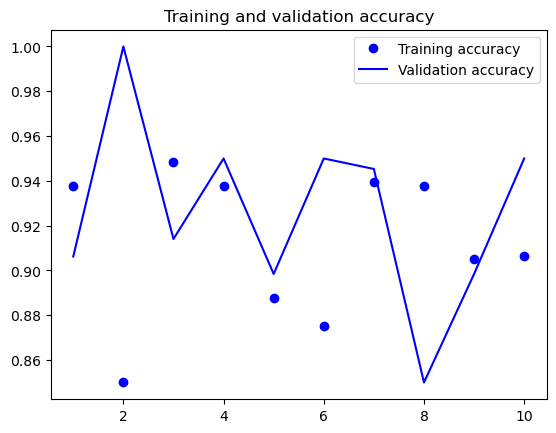

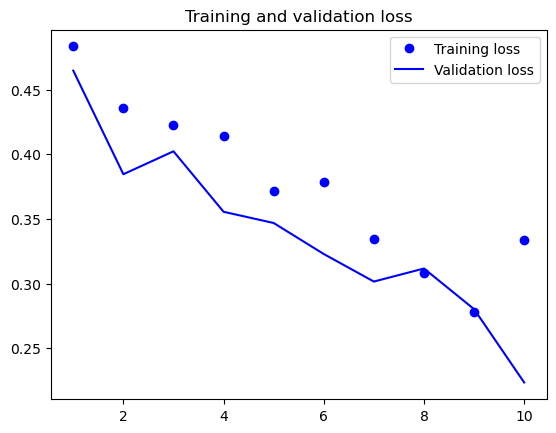

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
